In [115]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
from pathlib import Path
from panel.interact import interact
%matplotlib inline
import hvplot.pandas
from dotenv import load_dotenv


In [13]:
load_dotenv()

True

In [14]:
pn.extension("plotly")

In [57]:
load_dotenv_key =(".env")
map_box_api = os.getenv("Mapbox_key")


In [78]:
# Read the Mapbox API key
# mapbox_token = os.getenv("map_box_api")
type(map_box_api)

str

In [79]:
# Read the census data into a Pandas DataFrame
file_path = Path("C:/Users/fizza/Desktop/mapbox/sfo_neighborhoods_census_data.csv")
data = pd.read_csv(file_path, index_col="year")
data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182946,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [80]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units= data.groupby('year').mean()

housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)

,housing_units
year,
2010,372560.0
2011,374507.0
2012,376454.0
2013,378401.0
2014,380348.0
2015,382295.0
2016,384242.0


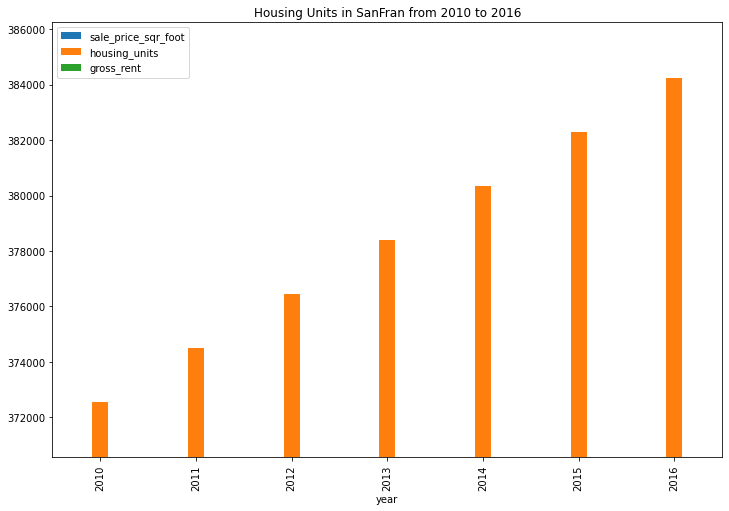

In [81]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
min = housing_units.min()['housing_units']
max = housing_units.max()['housing_units']
housing_units.plot.bar(ylim =(min-2000, max+2000),title="Housing Units in SanFran from 2010 to 2016",figsize=(12,8))

plt.show()
plt.close('housing_units')

In [82]:
# Calculate the average gross rent and average sale price per square foot
average_rent_sqr_foot = data["gross_rent"].groupby([data.index]).mean()
average_rent_sqr_foot

year
2010    1239.0
2011    1530.0
2012    2324.0
2013    2971.0
2014    3528.0
2015    3739.0
2016    4390.0
Name: gross_rent, dtype: float64

<AxesSubplot:title={'center':'Average Goss Rent per Year'}, xlabel='year'>

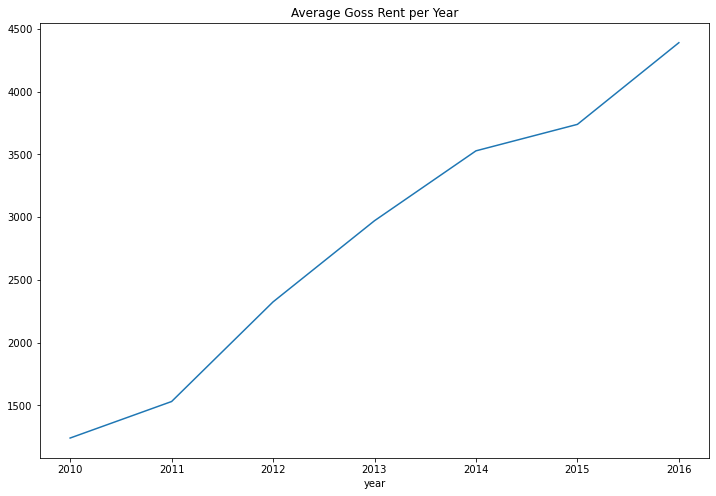

In [83]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_rent_sqr_foot.plot.line(title="Average Goss Rent per Year",figsize=(12,8))

<AxesSubplot:title={'center':'Average Sales Price per Square Foot in San Francisco'}, xlabel='year'>

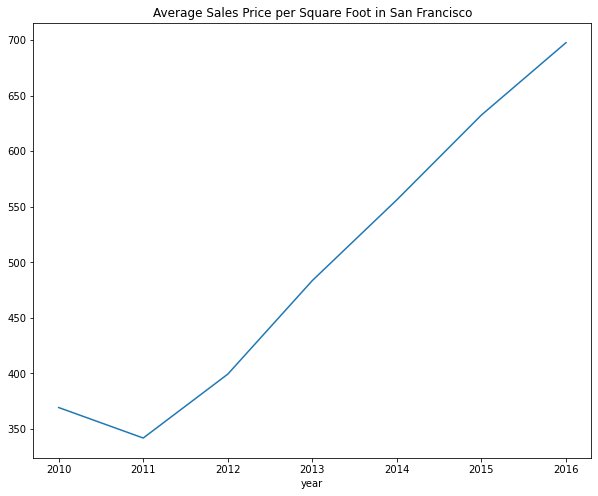

In [84]:
# Plot the Average Sales Price per Year as a line chart
average_price_per_sqr_foot = data["sale_price_sqr_foot"].groupby([data.index]).mean()
average_price_per_sqr_foot.plot(title="Average Sales Price per Square Foot in San Francisco",figsize=(10,8))

In [85]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sf_data_new = data.groupby([data.index, "neighborhood"]).mean()
sf_sales = sf_data_new["sale_price_sqr_foot"]
sf_sales_df = pd.DataFrame(sf_sales).reset_index()
sf_sales_df.head()

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182946
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [86]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):

    
    
    return sf_sales_df.loc[sf_sales_df['neighborhood']==neighborhood,:].hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        colormap="viridis",
        title="SF Sale per Square foot per Year",
    )

neighborhood_choice = sf_sales_df["neighborhood"]

interact(choose_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02229')

In [87]:
# Getting the data from the expensive neighborhoods
top_10_most_expensive = data.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10_most_expensive

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2015,Union Square District,2258.702832,382295,3739
2016,Presidio Heights,1465.968586,384242,4390
2016,Merced Heights,1416.666667,384242,4390
2013,Union Square District,1290.472107,378401,2971
2014,Miraloma Park,1267.766203,380348,3528
2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
2016,Outer Richmond,1196.645437,384242,4390
2015,Marina,1132.837361,382295,3739
2014,South of Market,1119.838877,380348,3528


In [88]:
avg_value_per_neighborhood = data.groupby([data["neighborhood"]]).mean()
avg_value_per_neighborhood = avg_value_per_neighborhood.reset_index()
avg_value_per_neighborhood.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333
5,Buena Vista Park,452.680591,378076.5,2698.833333
6,Central Richmond,394.422399,378401.0,2817.285714
7,Central Sunset,423.687928,378401.0,2817.285714
8,Clarendon Heights,487.244886,376454.0,2250.500000
9,Corona Heights,587.539067,377232.8,2472.000000


In [89]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_most_expensive.hvplot.bar(
    x="neighborhood", 
    y="sale_price_sqr_foot", 
    title="Top 10 Most Expensive Neighborhoods in San Francisco", 
    height=400,
    rot=46)

:Bars   [neighborhood]   (sale_price_sqr_foot)

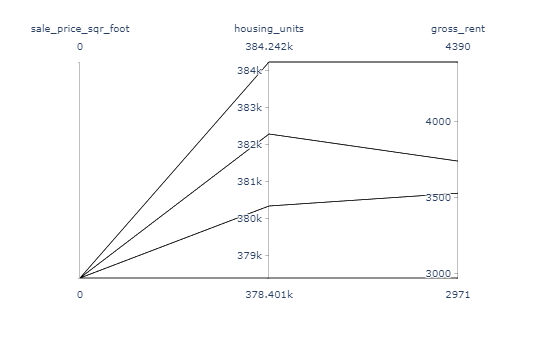

In [90]:
# Parallel Coordinates Plot
px.parallel_coordinates(top_10_most_expensive, color='sale_price_sqr_foot')

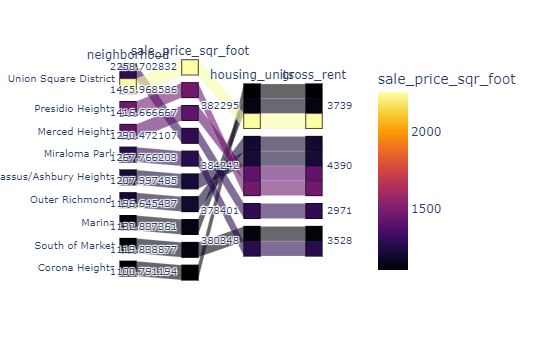

In [91]:
# Parallel Categories Plot
px.parallel_categories(
    top_10_most_expensive,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

In [92]:
# Load neighborhoods coordinates data
file_path = Path("C:/Users/fizza/Desktop/mapbox/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [93]:
# Calculate the mean values for each neighborhood
file_path = Path("C:/Users/fizza/Desktop/mapbox/neighborhoods_coordinates.csv")
df_neighborhood_location = pd.read_csv(file_path)

In [94]:
# Join the average values with the neighborhood locations
avg_value_location = pd.concat([avg_value_per_neighborhood, df_neighborhood_location], axis="columns", join="inner")
avg_value_location.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,Alamo Square,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,Anza Vista,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,Bayview,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,Bernal Heights,37.728630,-122.443050


In [119]:
# Create a scatter mapbox to analyze neighborhood info
map= px.scatter_mapbox(
    avg_value_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=25,
    zoom=11,
    hover_name="Neighborhood",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco"
)




In [120]:
fig.show()